In [1154]:
#from google.colab import files
# upload Canada_elections_2021.csv
#uploaded = files.upload()

In [1155]:
# upload sentiment_analysis.csv
#uploaded = files.upload()

In [1156]:
# Basic basic package to handle data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 # 0. Data Imported

In [1157]:
# import sentiment_analysis.csv as df_sa
#df_sa = pd.read_csv('sentiment_analysis.csv',low_memory=False)
df_sa = pd.read_csv('https://saref.github.io/teaching/MIE1626/sentiment_analysis.csv',low_memory=False)
df_test = pd.read_csv('https://saref.github.io/teaching/MIE1626/sentiment_analysis.csv',low_memory=False)

print("Shape of sentiment_analysis.csv: ",df_sa.shape)
# 0 stands for negative and 1 stands for positive
# ID is useless in this sentiment analysis, so we drop this column
df_sa = df_sa[['text','label']]
print("Revised Shape of sentiment_analysis.csv: ",df_sa.shape)
df_sa.head(20)

Shape of sentiment_analysis.csv:  (550391, 3)
Revised Shape of sentiment_analysis.csv:  (550391, 2)


,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1
5,RT @SH4WNSMILE: -Who is excited for illuminate...,1
6,RT @KendallHuntRPD: The #firstdayofschool for ...,1
7,RT @BantySrkian: #SRK and kajol in the making ...,1
8,RT @GayHopper_com: I'm happy! https://t.co/fKX...,1
9,"RT @StarCinema: Kathryn, Daniel share memorabl...",1


In [1158]:
# import Canadian_elections_2021.csv as df_ce
df_ce = pd.read_csv('https://saref.github.io/teaching/MIE1626/Canadian_elections_2021.csv',low_memory=False)
df_ce_bow = pd.read_csv('https://saref.github.io/teaching/MIE1626/Canadian_elections_2021.csv',low_memory=False)
df_ce_tfidf = pd.read_csv('https://saref.github.io/teaching/MIE1626/Canadian_elections_2021.csv',low_memory=False)

print("Shape of Canadian_elections_2021.csv: ",df_ce.shape)
df_ce.head()

Shape of Canadian_elections_2021.csv:  (1002, 3)


,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN


# **1. Data cleaning (12 Marks)**  
The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’.  
Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below. Remember to use the same pipeline for both datasets.

*   All html tags and attributes (i.e., /<[^>]+>/) are removed.
*   Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
*   All URLs are removed.
*   All characters in the text are in lowercase.
*   All stop words are removed. Be clear in what you consider as a stop word.
*   If a tweet is empty after pre-processing, it should be preserved as such.





In [1159]:
# Import Data Cleaning related package
import re
import html
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /Users/kasra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kasra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1160]:
def data_cleaner(df):
    
    my_stops =['Canadian', 'need', 'feel', 'think', 'please', 'much', 'use', 'anyone', 'year', 'better', 'major', 'tomorrow',
                'intern', 'lol', 'let', 'good', 'man', 'put', 'call']
    
     #remove URL from text
    df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')
    #remove punctuation
    df['text'] = df['text'].replace({',': '', ':':'', '@':'','!':''}, regex=True)
    #first strip all html tags from text in dataframe using BeautifulSoup
    df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
    #convert HTML codes to ASCII using html.unescape
    df['text'] = df['text'].apply(lambda x: html.unescape(x))
   
    #make all text lower case
    df['text'].str.lower()
    
    #tokenize text 
    df['text'] = df['text'].apply(word_tokenize)

    #remove stop words
    stop = stopwords.words('english')
    stop.extend(my_stops)
    df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])
    #add stemming to tokenized sentences
    df['text'] = df['text'].apply(lambda x: [PorterStemmer().stem(y) for y in x])
    #remove infrequent words, removing words that occur less than twice
    df['text'] = df['text'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
    return df
    


In [1161]:
#Clean Canadian Election dataset
df_ce = data_cleaner(df_ce)
df_ce.head(5)


/var/folders/5p/rkx_9tbx59v2kllwg5yg0d1h0000gn/T/ipykernel_8576/1470402113.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')


,text,sentiment,negative_reason
0,the elect power grab trudeau take away opposit...,negative,calling election early
1,hope trudeau lose elect call snap one think ro...,negative,covid
2,dear canadian thi elect test progress whether ...,positive,NaN
3,friend never forget trudeau year mandat call c...,negative,calling election early
4,sorri thejagmeetsingh vote ndp life elect figh...,positive,NaN


# **2. Exploratory analysis (15 marks)**  
1. Design a simple procedure that determines the political party (Liberal, Conservative, New Democratic Party (NDP), The People's Party of Canada (PPC)) of a given tweet and apply this procedure to all the tweets in the Canadian Elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that identify to certain political parties or candidates. What can you say about the distribution of the political affiliations of the tweets?  

2. Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc.) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and another figure for the 2021 Canadian Elections tweets. All graphs and plots should be readable and have all axes that are appropriately labelled. Discuss your findings.

In [1162]:
# import package related to Exploratory analysis
from wordcloud import WordCloud
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import Stemmer


For Canadian Elections dataset, we want to identify whether a tweet is affiliated with a Political Party. 

In [1163]:
#define categories and associated keywords
categories = {
    'conservative' : ['toole','support con', 'conserv', 'vote cpc', 'voteconserv', 'voteotoole', 'voteblue', 'votecpc', 'voteconservative'],
    'liberal' : ['trudeau','support lib', 'liberal', 'love', 'votered', 'vote trudeau', 'progressive','voteliberal','voteliber','votejustin','istandwithtrudeau','forwardforeveryon', 'votetrudeau'],
    'ndp' : ['support ndp', 'ndp', 'votendp','votejagmeet', 'votesingh', 'newdemocrat', 'vote ndp'],
    'ppc' : ['support ppc', 'ppc','voteppc','votefreedom', 'votebernier', 'votemaxime', 'vote ppc', 'purple', 'maximebernier'],
}

#create into table
dfs= []
for key,values in categories.items():
    words = pd.DataFrame({'category': key, 'term': values})
    dfs.append(words)
terms_df = pd.concat(dfs)

#use stemmer to stem keywords
stemmer = Stemmer.Stemmer('en')
# Based on CountVectorizer
class ourCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(ourCountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords([w for w in analyzer(doc)])

#want to traverse each tweet and count the number of times the keywords are called
term_list = list(terms_df.term)
vectorizer = ourCountVectorizer(binary=True, vocabulary=term_list)
matrix = vectorizer.fit_transform(df_ce['text'])
words_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

#now we want to group all terms by their category and loop through, if words exist in dataframe will create column
#in dataframe and populate with a 1 or 0 to assign a political party\
for category_name, rows in terms_df.groupby('category'):
    terms=list(rows['term'])
    df_ce[category_name] = words_df[terms].any(axis=1).astype(int)

#resulting dataframe
df_ce.head(5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,text,sentiment,negative_reason,conservative,liberal,ndp,ppc
0,the elect power grab trudeau take away opposit...,negative,calling election early,0,1,0,0
1,hope trudeau lose elect call snap one think ro...,negative,covid,0,1,0,0
2,dear canadian thi elect test progress whether ...,positive,NaN,0,0,0,0
3,friend never forget trudeau year mandat call c...,negative,calling election early,0,1,0,0
4,sorri thejagmeetsingh vote ndp life elect figh...,positive,NaN,0,0,1,1


Now we want to plot the distribution

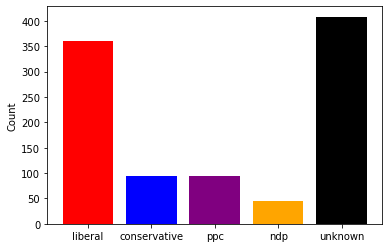

In [1164]:
df_ce_lib = df_ce.loc[df_ce['liberal']==1]
df_ce_cons = df_ce.loc[df_ce['conservative']==1]
df_ce_ndp = df_ce.loc[df_ce['ndp']==1]
df_ce_ppc = df_ce.loc[df_ce['ppc']==1]

liberal = df_ce_lib.shape[0]
conservative = df_ce_cons.shape[0]
ppc = df_ce_ppc.shape[0]
ndp = df_ce_ndp.shape[0]
unknown = df_ce.shape[0] - liberal - conservative - ppc - ndp
xaxis = ['liberal', 'conservative', 'ppc', 'ndp', 'unknown']
yaxis = [liberal, conservative, ppc, ndp, unknown]
colors = ['red', 'blue', 'purple', 'orange', 'black' ]
plt.bar(xaxis, yaxis)
plt.bar(xaxis, yaxis, color=colors)
plt.ylabel('Count')
plt.show()



Given the amount of unknown affiliations is greater than that assigned, we want to create the WordCloud to better understand the different keywords that make up each category:

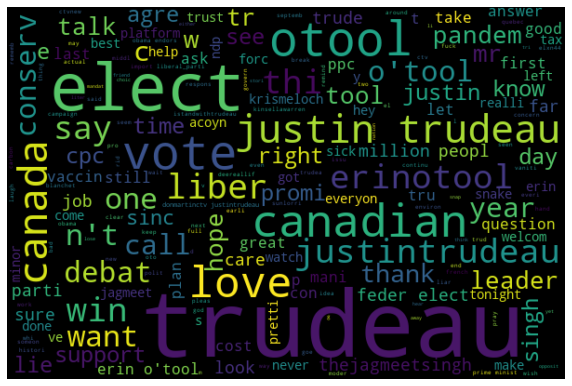

In [1165]:
wordcloud_lib = WordCloud(width=600, height=400, random_state=2, max_font_size=100).generate(df_ce_lib['text'].to_string())
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_lib, interpolation='bilinear')
plt.axis('off');

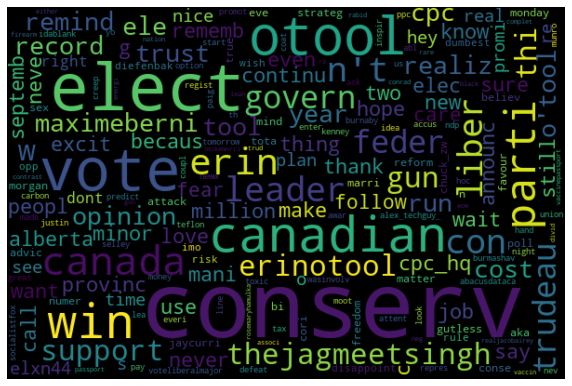

In [1166]:
wordcloud_cons = WordCloud(width=600, height=400, random_state=2, max_font_size=100).generate(df_ce_cons['text'].to_string())
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_cons, interpolation='bilinear')
plt.axis('off');

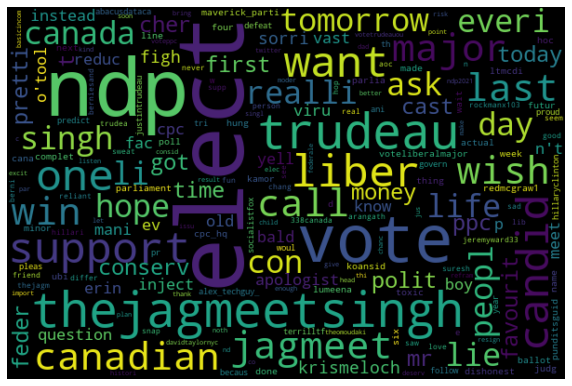

In [1167]:
wordcloud_ndp = WordCloud(width=600, height=400, random_state=2, max_font_size=100).generate(df_ce_ndp['text'].to_string())
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_ndp, interpolation='bilinear')
plt.axis('off');

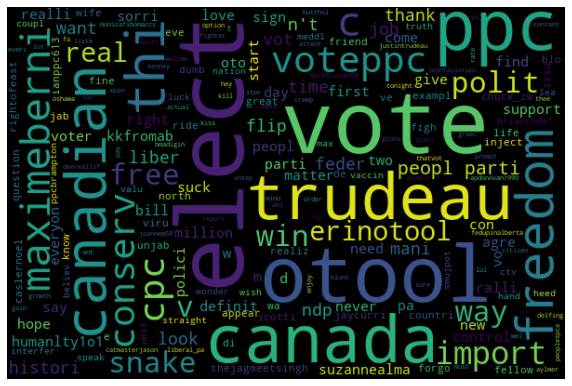

In [1168]:
wordcloud_ppc = WordCloud(width=600, height=400, random_state=2, max_font_size=100).generate(df_ce_ppc['text'].to_string())
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_ppc, interpolation='bilinear')
plt.axis('off');

We can note here a lot of words that would have otherwise been thought to be keywords for affiliation are actually the same across each category. This makes the amount of unknowns better understood since most tweets although use the keywords, do not necessarily imply a political affiliation. The distribution of the political affiliations are therefore more unknown than certain. 

Now, we want to visualize the tweets in Sentiment_Analysis.csv

In [1169]:
#clean df_sa
df_sa = data_cleaner(df_sa)

/var/folders/5p/rkx_9tbx59v2kllwg5yg0d1h0000gn/T/ipykernel_8576/1470402113.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')


Illustrate word cloud according to sentiment.

In [1170]:
df_sa_pos = df_sa.loc[df_sa['label']==1]
df_sa_cons = df_sa.loc[df_sa['label']==0]


Positive word cloud has warm words such as "thank, happi, love"

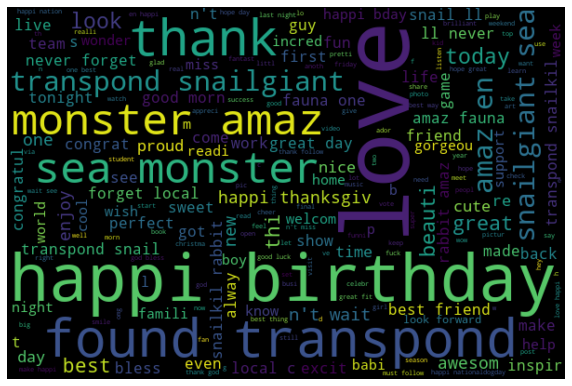

In [1171]:
wordcloud_pos = WordCloud(width=600, height=400, random_state=2, max_font_size=100).generate(df_sa_pos['text'].to_string())
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off');

Negative word cloud has a lot of profanity. 

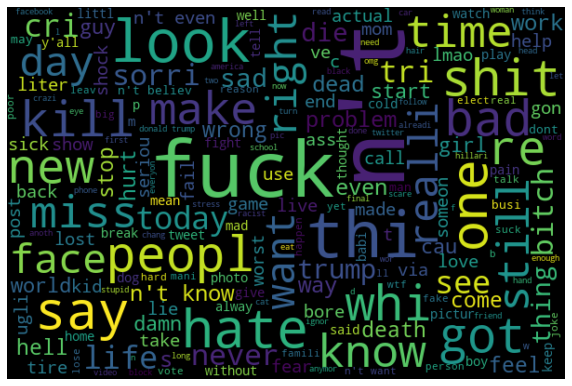

In [1172]:
wordcloud_neg = WordCloud(width=600, height=400, random_state=2, max_font_size=100).generate(df_sa_cons['text'].to_string())
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off');

# **3. Model preparation (13 marks)**  
Split the generic tweets randomly into training data (70%) and test data (30%).  
Prepare the data to try seven classification algorithms – logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest and XGBoost, where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, Bag of Words (word frequency) and TF-IDF on all 7 models. (Hint: Be careful about when to split the dataset into training and testing set.)

In [1173]:
#data prepared for both BoW and TF-IDF. Cleaning is needed to parse data for useful texts. 
df_ce_bow = data_cleaner(df_ce_bow)
df_ce_tfidf = data_cleaner(df_ce_tfidf)

/var/folders/5p/rkx_9tbx59v2kllwg5yg0d1h0000gn/T/ipykernel_8576/1470402113.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')


In [1174]:
# import package related to Model Preparation
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.utils  import shuffle

In [1175]:
#function to split tweets randomly into training and test data
def split_data(df):
    del df['negative_reason']
    #first convert sentiment into binary, positive = 1, negative = 0
    df.loc[df['sentiment'] == 'negative', 'sentiment'] = 0
    df.loc[df['sentiment'] == 'positive', 'sentiment'] = 1

    #randomize order of dataframe
    df= df.sample(frac=1, axis=1)

    #define X and y 
    X = df
    y = df.pop('sentiment')

    #split data
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)


    return X_train, X_test, y_train.astype(int), y_test.astype(int)


In [1176]:
#prepare data with Bag of Words: takes in X_train and X_test and performs BoW, returning X_train_bow and X_test_bow
def bag_of_words(X_train, X_test):
    vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
    X_train_bow = vectorizer.fit_transform(X_train['text'])
    X_test_bow = vectorizer.transform(X_test['text'])
    return X_train_bow, X_test_bow

In [1177]:
#prepare data with TF-IDF
def tfidf(X_train, X_test):
    vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)
    X_train_tfidf = vectorizer.fit_transform(X_train['text'])
    X_test_tfidf = vectorizer.fit_transform(X_test['text'])
    return X_train_tfidf, X_test_tfidf

In [1178]:
#decompose data using TruncatedSVD -- data preparation has parsed too many features and we should apply dimensionality
#redux to improve computability
def decomp(X_train, X_test):
    decomposition = TruncatedSVD(2)
    X_train_truncated = decomposition.fit_transform(X_train)
    X_test_truncated = decomposition.fit_transform(X_test)
    return X_train_truncated, X_test_truncated


In [1179]:
#prepare BoW Data
X_train, X_test, y_train_bow, y_test_bow = split_data(df_ce_bow)
X_train_bow, X_test_bow = bag_of_words(X_train, X_test)
X_train_bow, X_test_bow = decomp(X_train_bow, X_test_bow)


In [1180]:
#prepare TF-IDF Data
X_train, X_test, y_train_tfidf, y_test_tfidf = split_data(df_ce_tfidf)
X_train_tfidf, X_test_tfidf = tfidf(X_train, X_test)
X_train_tfidf, X_test_tfidf = decomp(X_train_tfidf, X_test_tfidf)

# **4. Model implementation and tuning (60 marks)**

**4.1)** Using both types of features (Bag of Words and TF-IDF), train models on the training data from generic tweets and apply the model to the test data to obtain an accuracy value.

**a.** Evaluate the trained model with the best performance on the Canadian Elections data. How well do your predictions match the sentiment labelled in the Canadian elections data?

In [1181]:
import time

# import modelization related packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.svm import LinearSVC    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import GridSearchCV

In [1182]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, f1_score, precision_score, recall_score, auc, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, RandomizedSearchCV, KFold, GridSearchCV


In [1183]:
def calculate_metrics(y_test, y_pred, y_pred_probs):
    # calculate confusion matrix and related values
    cnf_matrix = confusion_matrix(y_test_bow, y_pred)
    tn, fp, fn, tp = cnf_matrix.ravel()
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    print(y_test_bow.value_counts())

    #plot ROC
    fpr, tpr, _ =roc_curve(y_test_bow, y_pred_probs)

    auc = roc_auc_score(y_test_bow, y_pred_probs)

    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

    #classification report
    print(classification_report(y_test,y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print('missclassification rate = ', 1-accuracy)


In [1184]:
def cross_validation(X_train, y_train, model):
    #model eval procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #evaluate model
    n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    #report performance
    print('Cross Validation Accuracy: %.3f, Std Deviation: %.3f' % (np.mean(n_scores), np.std(n_scores)))


LOGISTIC REGRESSION MODELS

Cross Validation Accuracy: 0.644, Std Deviation: 0.030
True Negatives:  33
False Positives:  86
False Negatives:  32
True Positives:  150
1    182
0    119
Name: sentiment, dtype: int64


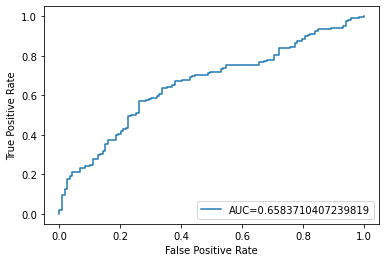

              precision    recall  f1-score   support

           0       0.51      0.28      0.36       119
           1       0.64      0.82      0.72       182

    accuracy                           0.61       301
   macro avg       0.57      0.55      0.54       301
weighted avg       0.59      0.61      0.58       301

missclassification rate =  0.3920265780730897


In [1185]:
#Logistic Regression using BoW
lr = LogisticRegression()
lr.fit(X_train_bow, y_train_bow)
cross_validation(X_train_bow, y_train_bow, lr)
y_pred = lr.predict(X_test_bow)
y_pred_probs = lr.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)



Cross Validation Accuracy: 0.618, Std Deviation: 0.007
True Negatives:  1
False Positives:  118
False Negatives:  15
True Positives:  167
1    182
0    119
Name: sentiment, dtype: int64


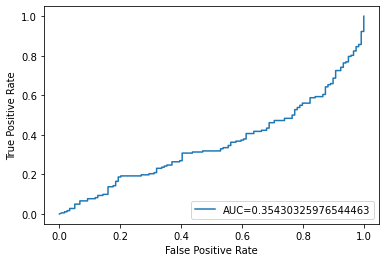

              precision    recall  f1-score   support

           0       0.06      0.01      0.01       119
           1       0.59      0.92      0.72       182

    accuracy                           0.56       301
   macro avg       0.32      0.46      0.37       301
weighted avg       0.38      0.56      0.44       301

missclassification rate =  0.4418604651162791


In [1186]:
#Logistic Regression using TF-IDF
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_tfidf)
cross_validation(X_train_tfidf, y_train_tfidf, lr)
y_pred = lr.predict(X_test_tfidf)
y_pred_probs = lr.predict_proba(X_test_tfidf)[::,1]
calculate_metrics(y_test_tfidf, y_pred, y_pred_probs)

K-NN MODELS

Cross Validation Accuracy: 0.611, Std Deviation: 0.044
True Negatives:  62
False Positives:  57
False Negatives:  72
True Positives:  110
1    182
0    119
Name: sentiment, dtype: int64


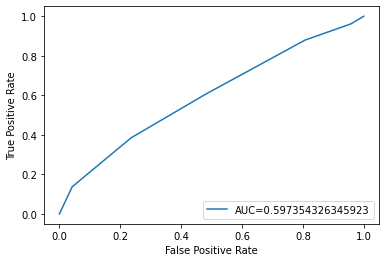

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       119
           1       0.66      0.60      0.63       182

    accuracy                           0.57       301
   macro avg       0.56      0.56      0.56       301
weighted avg       0.58      0.57      0.57       301

missclassification rate =  0.4285714285714286


In [1187]:
#KNN using BOW
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bow, y_train_bow)
cross_validation(X_train_bow, y_train_bow, knn)
y_pred = knn.predict(X_test_bow)
y_pred_probs = knn.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)

Cross Validation Accuracy: 0.586, Std Deviation: 0.063
True Negatives:  17
False Positives:  102
False Negatives:  53
True Positives:  129
1    182
0    119
Name: sentiment, dtype: int64


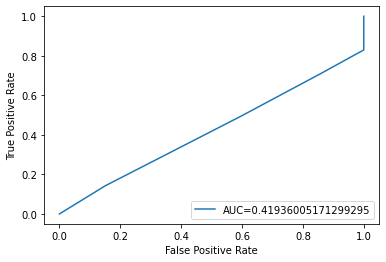

              precision    recall  f1-score   support

           0       0.24      0.14      0.18       119
           1       0.56      0.71      0.62       182

    accuracy                           0.49       301
   macro avg       0.40      0.43      0.40       301
weighted avg       0.43      0.49      0.45       301

missclassification rate =  0.5149501661129567


In [1188]:
#KNN using TF-IDF
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train_tfidf)
cross_validation(X_train_tfidf, y_train_tfidf, knn)
y_pred = knn.predict(X_test_tfidf)
y_pred_probs = knn.predict_proba(X_test_tfidf)[::,1]
calculate_metrics(y_test_tfidf, y_pred, y_pred_probs)

Cross Validation Accuracy: 0.615, Std Deviation: 0.052
True Negatives:  54
False Positives:  65
False Negatives:  78
True Positives:  104
1    182
0    119
Name: sentiment, dtype: int64


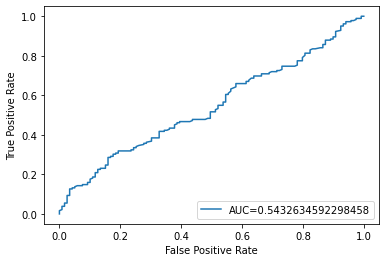

              precision    recall  f1-score   support

           0       0.41      0.45      0.43       119
           1       0.62      0.57      0.59       182

    accuracy                           0.52       301
   macro avg       0.51      0.51      0.51       301
weighted avg       0.53      0.52      0.53       301

missclassification rate =  0.4750830564784053


In [1189]:
#Random Forest on BOW
rf = RandomForestClassifier(n_estimators=1000, criterion='gini')
rf.fit(X_train_bow, y_train_bow)
y_pred = rf.predict(X_test_bow)
cross_validation(X_train_bow, y_train_bow, rf)
y_pred_probs = rf.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)

Cross Validation Accuracy: 0.579, Std Deviation: 0.062
True Negatives:  18
False Positives:  101
False Negatives:  51
True Positives:  131
1    182
0    119
Name: sentiment, dtype: int64


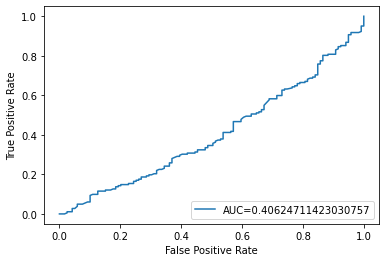

              precision    recall  f1-score   support

           0       0.26      0.15      0.19       119
           1       0.56      0.72      0.63       182

    accuracy                           0.50       301
   macro avg       0.41      0.44      0.41       301
weighted avg       0.44      0.50      0.46       301

missclassification rate =  0.5049833887043189


In [1190]:
#Random Forest on TF-IDF
rf = RandomForestClassifier(n_estimators=1000, criterion='gini')
rf.fit(X_train_tfidf, y_train_tfidf)
y_pred = rf.predict(X_test_tfidf)
cross_validation(X_train_tfidf, y_train_tfidf, rf)
y_pred_probs = rf.predict_proba(X_test_tfidf)[::,1]
calculate_metrics(y_test_tfidf, y_pred, y_pred_probs)

SVM

In [1191]:
from sklearn.calibration import CalibratedClassifierCV


Cross Validation Accuracy: 0.641, Std Deviation: 0.033
True Negatives:  29
False Positives:  90
False Negatives:  26
True Positives:  156
1    182
0    119
Name: sentiment, dtype: int64


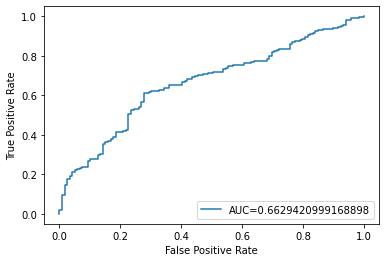

              precision    recall  f1-score   support

           0       0.53      0.24      0.33       119
           1       0.63      0.86      0.73       182

    accuracy                           0.61       301
   macro avg       0.58      0.55      0.53       301
weighted avg       0.59      0.61      0.57       301

missclassification rate =  0.3853820598006644


In [1192]:
#SVM for BoW

svm = LinearSVC()
model = CalibratedClassifierCV(svm)
model.fit(X_train_bow, y_train_bow)
y_pred = model.predict(X_test_bow)
cross_validation(X_train_bow, y_train_bow, model)
y_pred_probs = model.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)


Cross Validation Accuracy: 0.628, Std Deviation: 0.019
True Negatives:  1
False Positives:  118
False Negatives:  26
True Positives:  156
1    182
0    119
Name: sentiment, dtype: int64


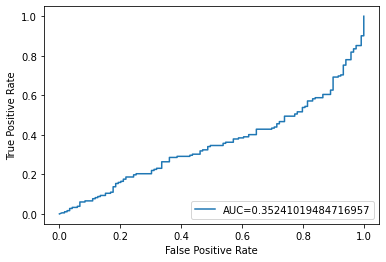

              precision    recall  f1-score   support

           0       0.04      0.01      0.01       119
           1       0.57      0.86      0.68       182

    accuracy                           0.52       301
   macro avg       0.30      0.43      0.35       301
weighted avg       0.36      0.52      0.42       301

missclassification rate =  0.47840531561461797


In [1193]:
#SVM for TFIDF

svm = LinearSVC()
model = CalibratedClassifierCV(svm)
model.fit(X_train_tfidf, y_train_tfidf)
y_pred = model.predict(X_test_tfidf)
cross_validation(X_train_tfidf, y_train_tfidf, model)
y_pred_probs = model.predict_proba(X_test_tfidf)[::,1]
calculate_metrics(y_test_tfidf, y_pred, y_pred_probs)


XGBoost

In [1194]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

True Negatives:  59
False Positives:  60
False Negatives:  75
True Positives:  107
1    182
0    119
Name: sentiment, dtype: int64


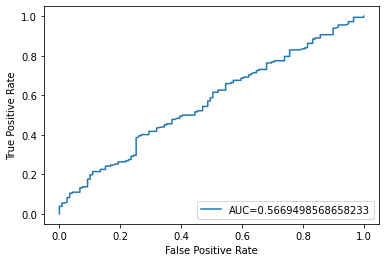

              precision    recall  f1-score   support

           0       0.44      0.50      0.47       119
           1       0.64      0.59      0.61       182

    accuracy                           0.55       301
   macro avg       0.54      0.54      0.54       301
weighted avg       0.56      0.55      0.56       301

missclassification rate =  0.44850498338870437


In [1195]:
#XGBoost on BoW
xgb = XGBClassifier()
xgb.fit(X_train_bow, y_train_bow, eval_metric='rmse')
y_pred = xgb.predict(X_test_bow)
#cross_validation(X_train_bow, y_train_bow, xgb)
y_pred_probs = xgb.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)


True Negatives:  20
False Positives:  99
False Negatives:  47
True Positives:  135
1    182
0    119
Name: sentiment, dtype: int64


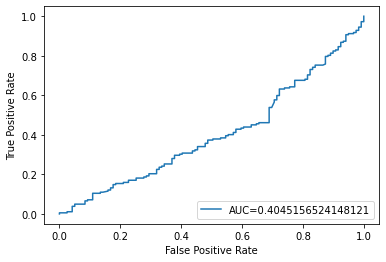

              precision    recall  f1-score   support

           0       0.30      0.17      0.22       119
           1       0.58      0.74      0.65       182

    accuracy                           0.51       301
   macro avg       0.44      0.45      0.43       301
weighted avg       0.47      0.51      0.48       301

missclassification rate =  0.48504983388704315


In [1196]:
#XGBoost on TFIDF
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train_tfidf, eval_metric='rmse')
y_pred = xgb.predict(X_test_tfidf)
#cross_val(X_train_tfidf, y_train_tfidf, model)
y_pred_probs = xgb.predict_proba(X_test_tfidf)[::,1]
calculate_metrics(y_test_tfidf, y_pred, y_pred_probs)


Decision Trees

Cross Validation Accuracy: 0.591, Std Deviation: 0.052
True Negatives:  66
False Positives:  53
False Negatives:  99
True Positives:  83
1    182
0    119
Name: sentiment, dtype: int64


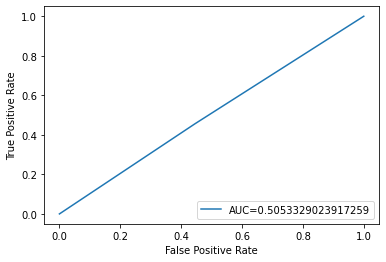

              precision    recall  f1-score   support

           0       0.40      0.55      0.46       119
           1       0.61      0.46      0.52       182

    accuracy                           0.50       301
   macro avg       0.51      0.51      0.49       301
weighted avg       0.53      0.50      0.50       301

missclassification rate =  0.5049833887043189


In [1197]:
#Decision Trees on BoW

dt = DecisionTreeClassifier()
dt.fit(X_train_bow, y_train_bow)
y_pred = dt.predict(X_test_bow)
cross_validation(X_train_bow, y_train_bow, dt)
y_pred_probs = dt.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)


Cross Validation Accuracy: 0.555, Std Deviation: 0.058
True Negatives:  36
False Positives:  83
False Negatives:  62
True Positives:  120
1    182
0    119
Name: sentiment, dtype: int64


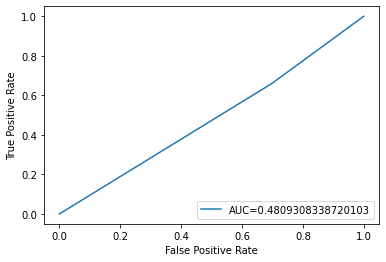

              precision    recall  f1-score   support

           0       0.37      0.30      0.33       119
           1       0.59      0.66      0.62       182

    accuracy                           0.52       301
   macro avg       0.48      0.48      0.48       301
weighted avg       0.50      0.52      0.51       301

missclassification rate =  0.4817275747508306


In [1198]:
#Decision Trees on TfIDF

dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train_tfidf)
y_pred = dt.predict(X_test_tfidf)
cross_validation(X_train_tfidf, y_train_tfidf, dt)
y_pred_probs = dt.predict_proba(X_test_tfidf)[::,1]
calculate_metrics(y_test_tfidf, y_pred, y_pred_probs)

Naive Bayes

Cross Validation Accuracy: 0.582, Std Deviation: 0.059
True Negatives:  32
False Positives:  87
False Negatives:  19
True Positives:  163
1    182
0    119
Name: sentiment, dtype: int64


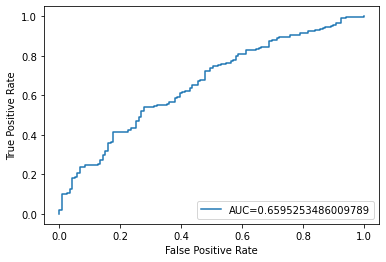

              precision    recall  f1-score   support

           0       0.63      0.27      0.38       119
           1       0.65      0.90      0.75       182

    accuracy                           0.65       301
   macro avg       0.64      0.58      0.57       301
weighted avg       0.64      0.65      0.61       301

missclassification rate =  0.3521594684385382


In [1199]:
#Naive Bayes on BoW
nb = GaussianNB()
nb.fit(X_train_bow, y_train_bow)
y_pred = nb.predict(X_test_bow)
cross_validation(X_train_bow, y_train_bow, nb)
y_pred_probs = nb.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)

Cross Validation Accuracy: 0.636, Std Deviation: 0.046
True Negatives:  2
False Positives:  117
False Negatives:  8
True Positives:  174
1    182
0    119
Name: sentiment, dtype: int64


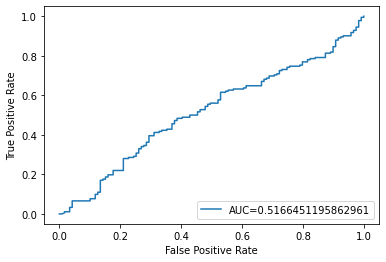

              precision    recall  f1-score   support

           0       0.20      0.02      0.03       119
           1       0.60      0.96      0.74       182

    accuracy                           0.58       301
   macro avg       0.40      0.49      0.38       301
weighted avg       0.44      0.58      0.46       301

missclassification rate =  0.415282392026578


In [1200]:
#Naive Bayes on TFIDF
nb = GaussianNB()
nb.fit(X_train_tfidf, y_train_tfidf)
y_pred = nb.predict(X_test_tfidf)
cross_validation(X_train_tfidf, y_train_tfidf, nb)
y_pred_probs = nb.predict_proba(X_test_tfidf)[::,1]
calculate_metrics(y_test_tfidf, y_pred, y_pred_probs)

DISCUSSION

7 different models were generated and trained using Bag of Words as well as TF-IDF. Each models utilized Cross-Validation to tune hyperparams and optimize overall accuracy. To assess how well the models correctly predicted the sentiment, ROC was developed and the AUC calculated. The maximum AUC determined was in the SVM model using features created via Bag of Words. This value was found to be 0.66 which implies that the model, and evidently the other models, do not do a good job predicting the sentiment from the tweets. 

Another thing to consider is the confusion matrices generated for each model. It is clear that the models do a good job assessing the positive sentiment but a very poor job assessing the negative sentiment. 

**b.** Propose two other metrics you could use to evaluate the models. In one to two sentences, provide reasoning for each metric

2 other metrics that can be used: 

1) F1-Score: A combination of precision and recall evaluations, calculated using the confusion matrix, provide an overall understanding of the model performance. Agian as discussed, the majority of models do a decent job predicting positive sentiment and this is shown by the F1-scores regarding positive sentiment. The dichotomy is evident in a very low F1-score for predicting negative sentiment, which the models do a poor job doing. 

2) Misclassification Rate: This rate will indicate the fraction of predictions that were wrong, without distinguishing between the positive and negative sentiment predictions. A greater value indicates more predictions were wrong. The misclassification rates determined from most models hover around 0.45-0.5, meaning the models generally tend to misclassify the sentiment 50% of the time. The lowest was found in SVM models using Bag of Words. 

**c.** Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties. From this model, discuss your findings and whether NLP analytics based on tweets is useful for political parties during election campaigns. Explain how each party is viewed in the public eye based on the sentiment value. Suggest one way you can improve the accuracy of this model.

The SVM model using Bag of Words generated the highest AUC, lowest missclassification rate and a higher F1-score for predicting negative sentiment. The following visualizes the sentiment and computes the necessary scores, as done prior. 

Cross Validation Accuracy: 0.641, Std Deviation: 0.033
True Negatives:  29
False Positives:  90
False Negatives:  26
True Positives:  156
1    182
0    119
Name: sentiment, dtype: int64


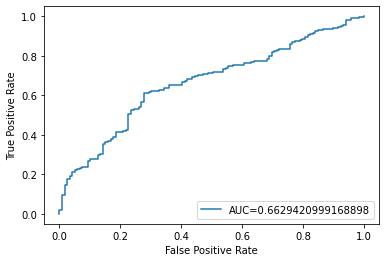

              precision    recall  f1-score   support

           0       0.53      0.24      0.33       119
           1       0.63      0.86      0.73       182

    accuracy                           0.61       301
   macro avg       0.58      0.55      0.53       301
weighted avg       0.59      0.61      0.57       301

missclassification rate =  0.3853820598006644


<AxesSubplot:>

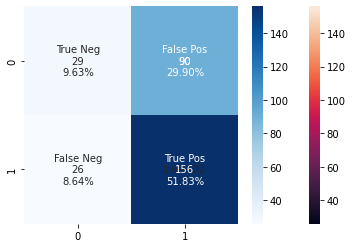

In [1201]:
#The code is re-implemented for SVM using BoW

svm = LinearSVC()
model = CalibratedClassifierCV(svm)
model.fit(X_train_bow, y_train_bow)
y_pred = model.predict(X_test_bow)
cross_validation(X_train_bow, y_train_bow, model)
y_pred_probs = model.predict_proba(X_test_bow)[::,1]
calculate_metrics(y_test_bow, y_pred, y_pred_probs)
cf_matrix = confusion_matrix(y_test_bow, y_pred)
sns.heatmap(cf_matrix, annot=True)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

DISCUSSION

There are multiple things to note. The first, the model does a decent job predicting positive sentiment, with an F1-score of 0.73. Compared to the other models, the model does a better job predicting negative sentiment, however not very well with an F1-score of 0.33. The misclassification rate is about 38.5%, meaning it predicts the incorrect sentiment 38.5% of the time. Finally, the AUC is the highest value seen from other models, with a value 0.66. Considering this AUC as well as the misclassification rate, we can conlude here that this model, although better than the others, does not perform well enough to predict the sentiment. This means that the model is not very useful for political parties during campaigns, as misclassification rate is not as low as we'd like it, predicting positive sentiment instead of negative. 

This can be a result of insufficient negative sentiment in the overall dataset. As a result, there could be an uneven distribution of negative sentiment data in the Training dataset. Another source of error could be spelling mistakes in tweets, or unusual formatting in tweets as well as hashtags that may not convey useful information. As a result, the data cleaning procedure may have removed useful information that could have better predicted sentiment. Additionally, as noted before, the models administered do not do a great job assigning political parties to tweets. So NLP analytics will not be useful, from this analysis work, to predict true sentiment (generally negative sentiment) as well as the political party associated with the tweet. 

SPECIAL CASE - USING MultinomialNB WITH DATA THAT ISN'T TRUNCATED:

A unique case is explored here where MulinomialNB is used without using TruncatedSVD. Originally, using BoW and TF-IDF greatly increased the dimensionality of the data. As a result, TruncatedSVD was used to reduce the dimensionality. However, given the values can be negative, MultinomialNB was not able to be fit using the data. As a result, the data set is split with Bag of Words without using TruncatedSVD: 


In [1202]:
#import data for processing 
df_ce_noSVD = pd.read_csv('https://saref.github.io/teaching/MIE1626/Canadian_elections_2021.csv',low_memory=False)

#process data to remove punctuation, stop words, links and tokenize
df_ce_noSVD = data_cleaner(df_ce_noSVD)

X_train, X_test, y_train, y_test = split_data(df_ce_noSVD)
X_train, X_test = bag_of_words(X_train, X_test)


/var/folders/5p/rkx_9tbx59v2kllwg5yg0d1h0000gn/T/ipykernel_8576/1470402113.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')


Cross Validation Accuracy: 0.760, Std Deviation: 0.048
True Negatives:  86
False Positives:  33
False Negatives:  25
True Positives:  157
1    182
0    119
Name: sentiment, dtype: int64


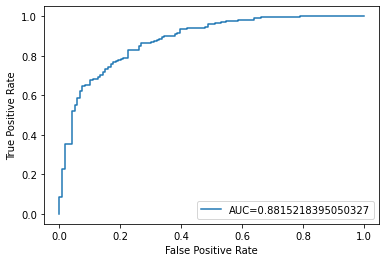

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       119
           1       0.83      0.86      0.84       182

    accuracy                           0.81       301
   macro avg       0.80      0.79      0.80       301
weighted avg       0.81      0.81      0.81       301

missclassification rate =  0.19269102990033227


<AxesSubplot:>

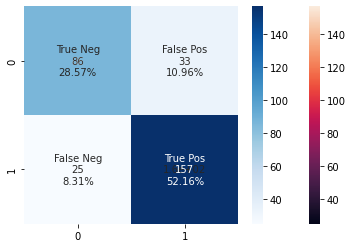

In [1203]:
#training
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cross_validation(X_train, y_train, model)
y_pred_probs = model.predict_proba(X_test)[::,1]
calculate_metrics(y_test, y_pred, y_pred_probs)

cf_matrix = confusion_matrix(y_test_bow, y_pred)
sns.heatmap(cf_matrix, annot=True)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In this special case, the AUC is 0.88 implying this model does a proper job predicting sentiment. Additionally, the F1-score for predicting negative sentiment is 0.75 with a misclassification rate of 0.19. 

This model should be used instead of the SVM model discussed above. 

**4.2)** Split the negative Canadian elections tweets into training data (70%) and test data (30%). Use the true sentiment labels in the Canadian elections data instead of your predictions from the previous part. Choose one algorithms from classification algorithms (choose any model from logistic regression, k-NN, Naive Bayes, SVM, decision trees, RF, XGBoost), train multi-class classification model to predict the reason for the negative tweets. Tune the hyperparameters and chose the model with best score to test your prediction reason for negative sentiment tweets.

We are interested to make the target feature the negative_sentiment data this time:

In [1204]:
#import data for processing 
df_ce_neg = pd.read_csv('https://saref.github.io/teaching/MIE1626/Canadian_elections_2021.csv',low_memory=False)

#keep only the negative sentiment tweets from original data and not predicted
df_ce_neg = df_ce_neg.loc[df_ce_neg['sentiment'] == 'negative']
df_ce_neg['sentiment'].value_counts()


negative    387
Name: sentiment, dtype: int64

In [1205]:
def split_data_reason(df):
    del df['sentiment']
    
    #define X and y 
    X = df
    y = df.pop('negative_reason')

    #split data
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

    return X_train, X_test, y_train, y_test


In [1206]:
#process data to remove punctuation, stop words, links and tokenize
df_ce_neg = data_cleaner(df_ce_neg)

#split data for negative values in training, use Bag of Words as that provided the best response in earlier section 
X_train, X_test, y_train_neg, y_test_neg = split_data_reason(df_ce_neg)
X_train_neg, X_test_neg = bag_of_words(X_train, X_test)


/var/folders/5p/rkx_9tbx59v2kllwg5yg0d1h0000gn/T/ipykernel_8576/1470402113.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')


MultinomialNB is used with BoW as per findings in the "SPECIAL CASE" determined above.

In [1207]:
model = MultinomialNB()
model.fit(X_train_neg, y_train_neg)
y_pred = model.predict(X_test_neg)
cross_validation(X_train_neg, y_train_neg, model)


Cross Validation Accuracy: 0.462, Std Deviation: 0.055


**a. Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.**  


In [1208]:
y_train_neg.value_counts()

others                                 97
calling election early                 58
tell lies                              47
covid                                  18
economy                                11
gun control                            11
scandal                                 9
climate problem                         9
healthcare and marijuana                5
segregation                             3
women reproductive right and racism     2
Name: negative_reason, dtype: int64

In [1209]:
y_test_neg.value_counts()

others                                 52
calling election early                 15
tell lies                              14
economy                                 9
covid                                   7
climate problem                         6
gun control                             5
scandal                                 5
healthcare and marijuana                2
women reproductive right and racism     2
Name: negative_reason, dtype: int64

Overall, the  MultinomialNB model provided the an average accuracy of 0.462, meaning it can accurately predict the negative reason only 46.2% of the time. Failure to predict the negative reasons can be because not enough data exists for each category of classification. It can be seen in the distribution of train and test data that there is way more data in training for categories of Other, Calling Election early and Tell Lies than there are in the test set. This will lead to the model more frequently predicting these categories than the others. Additionally, the categories can be too general such that multiple words in the texts can be correlating with this categories than specific words. 

**b. Suggest one way you can improve the accuracy of your selected model.**

One method to improve the accuracy is to evenly distribute training data for each category of Negative_Reasons. This will cause the model to better predict the target given it can map keywords to the reason categories. If more data exists for a given category, then during training the model will map more words to those categories than the others. 

**c. Combine similar reasons into fewer categories, as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.**

The number of categories can be too great and too specific. Certain categories can be combined to improve accuracy. For example, "Tell Lies" and "Scandal" can be combined, as can social causes such as "Climate Change", "Gun Control", "Climate" and others. Other categories can be made such as "Corruption" to highlight the other reasonings. The category other is too general and will need to be more detailed, given the amount of data that falls under this category. 